# Проект выполнили:

*   ***Буякова Екатерина Сергеевна***

    ИСУ: 367953

    Группа: K3344

    Поток: 1.2

*  ***Кибенко Дарья Владимировна***
    
    ИСУ: 368285

    Группа: K3344

    Поток: 1.3



# Постановка задач:

* Проверить данные на наличие пропусков и аномалий, при необходимости выполнить предобработку данных;

*   Выполнить разведочный анализ данных (EDA) для выявления закономерностей и зависимостей между характеристиками автомобилей и их стоимостью;

*   Исследовать распределение целевой переменной (стоимость) и распределение других признаков;

*   Выбрать и обучить несколько различных моделей машинного обучения, таких как линейная регрессия и CatBoost;

* Оценить точность моделей с помощью метрик: средняя абсолютная ошибка (MAE) и R².

# Сбор/подбор данных:

Датасет на kaggle - https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

# Разведочный анализ данных

Для начала мы выбрали подходящие библиотеки, которые будем использовать в рамках нашего проекта

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('/content/car_price_prediction.csv')

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Представленный набор данных содержит информацию о различных характеристиках машин:
1. ***Car_Name*** - название машины
2. ***Year*** - год
3. ***Selling_Price*** - цена на продаже
4. ***Present_Price***  - текущая стоимость
5. ***Kms_Driven*** - пробег
6. ***Fuel_Type*** - тип двигателя
7. ***Seller_Type*** - тип продавца
8. ***Transmission***	- коробка передач
9. ***Owner*** - владелец

Конечная работы заключается в том, чтобы предсказать стоимость машины (Present_Price) по каким-то косвенным признакам, известным о ней. Для этого лучше всего использовать задачу регрессии и такие метрики, как:
- MAE
- R-squared

Обоснование выбора:
- MAE легко интерпретировать, так как данная мера представляет собой среднее абсолютное отклонение предсказанных значений от фактических. Это дает понимание реальной ошибки в тех же единицах, что и сама зависимая переменная. MAE менее чувствительна к выбросам, потому что она не усиливает влияние больших отклонений относительно малых отклонений.
- R-squared показывает какая доля вариативности зависимой переменной объяснима моделью. Значение  равное 1 указывает на идеальное соответствие, а значение 0 указывает на то, что модель совсем не способна объяснить вариативность данных. Метрика полезна для понимания процентного объема вариативности.

# Перейдём к работе с данными

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


В наборе представлены данные разных типов:
- float64 (2)
- int64 (3)
- object (4)

In [ ]:
df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


Можно увидеть, что пропуски в данных отсутствуют.

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
unique_car_names = df['Car_Name'].nunique()
unique_car_names

98

В датасете много уникальных названий машин, поэтому можно избавиться от этого столбца, чтобы не "засорять" данные.

In [ ]:
df_dropped = df.drop('Car_Name', axis=1)

df_dropped.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Столбец 'Year' не несет в себе большого количества полезной информации. Можно создать новый столбец 'Current_age', в котором будет посчитан текущий возраст машины.

In [ ]:
df_dropped['Current_age'] = 2024 - df_dropped['Year']
df_dropped = df_dropped.drop('Year', axis=1)

df_dropped.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


# Числовые признаки

In [ ]:
num_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Current_age']

In [ ]:
file_names = []

for col in num_cols:
    fig = px.box(df_dropped, y=col, title=f'График ящик с усами для {col}')
    fig.update_layout(height=600, width=800)
    fig.show()

    file_name = f'boxplot_{col}.html'
    file_names.append(file_name)

    fig.write_html(file_name)

# Категориальные признаки

In [ ]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']

In [ ]:
for col in cat_cols:
    sum_counts = df_dropped[col].value_counts()

    # 1-й уровень, центр диаграммы
    labels = ["Всего данных: " + str(sum(sum_counts))]
    parents = [""]
    values = [sum(sum_counts)]

    # 2-й уровень, "лепестки" диаграммы
    second_level_dict = {x: 'Количество: ' + str(sum_counts[x]) + '<br>' + str(x) for x in sum_counts.index}
    labels += list(map(lambda x: second_level_dict[x], sum_counts.index))
    parents += [labels[0]] * len(sum_counts)
    values += sum_counts.tolist()

    fig = go.Figure(go.Sunburst(
        labels=labels,
        parents=parents,
        values=values,
        branchvalues="total"
    ))

    fig.update_layout(title=f'Соотношение {col}', height=600, width=800)

    fig.show()

    file_name = f'sunburst_{col}.html'
    file_names.append(file_name)
    fig.write_html(file_name)

In [ ]:
fig = make_subplots(rows=1, cols=len(cat_cols), subplot_titles=[f'Процентное соотношение {col}' for col in cat_cols], specs=[[{'type': 'domain'}]*len(cat_cols)])

for i, col in enumerate(cat_cols):
    cat_counts = df_dropped[col].value_counts()

    pull = [0] * len(cat_counts)
    pull[cat_counts.tolist().index(cat_counts.max())] = 0.2

    fig.add_trace(go.Pie(values=cat_counts, labels=cat_counts.index, pull=pull, hole=0.9), row=1, col=i+1)

fig.update_layout(height=600, width=1400, title_text='Процентное соотношение категориальных переменных')
fig.show()

file_names = []
for col in cat_cols:
    cat_counts = df_dropped[col].value_counts()

    pull = [0] * len(cat_counts)
    pull[cat_counts.tolist().index(cat_counts.max())] = 0.2

    fig_single = go.Figure(go.Pie(values=cat_counts, labels=cat_counts.index, pull=pull, hole=0.9))
    fig_single.update_layout(title=f'Процентное соотношение {col}', height=600, width=800)

    file_name = f'piechart_{col}.html'
    file_names.append(file_name)
    fig_single.write_html(file_name)

- Fuel_Type: наиболее распространены машины, использующие бензин (79.4%)
- Seller_Type: чуть больше половины машин продается диллерами (64.8%)
- Transmission: подавляющие большинство машин имеют механическую коробку передач (86.7%)

Преобразуем категориальные данные в числовые:

In [ ]:
df_dummies=pd.get_dummies(df_dropped, drop_first=True)

df_dummies.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


In [ ]:
corrmap = df_dummies.corr()

top_corr_features = corrmap.index

fig1 = px.imshow(corrmap,
                labels=dict(color="Correlation"),
                x=top_corr_features,
                y=top_corr_features,
                color_continuous_scale="RdYlGn",
                color_continuous_midpoint=0)

fig1.show()

fig1.write_html("correlation_map.html")

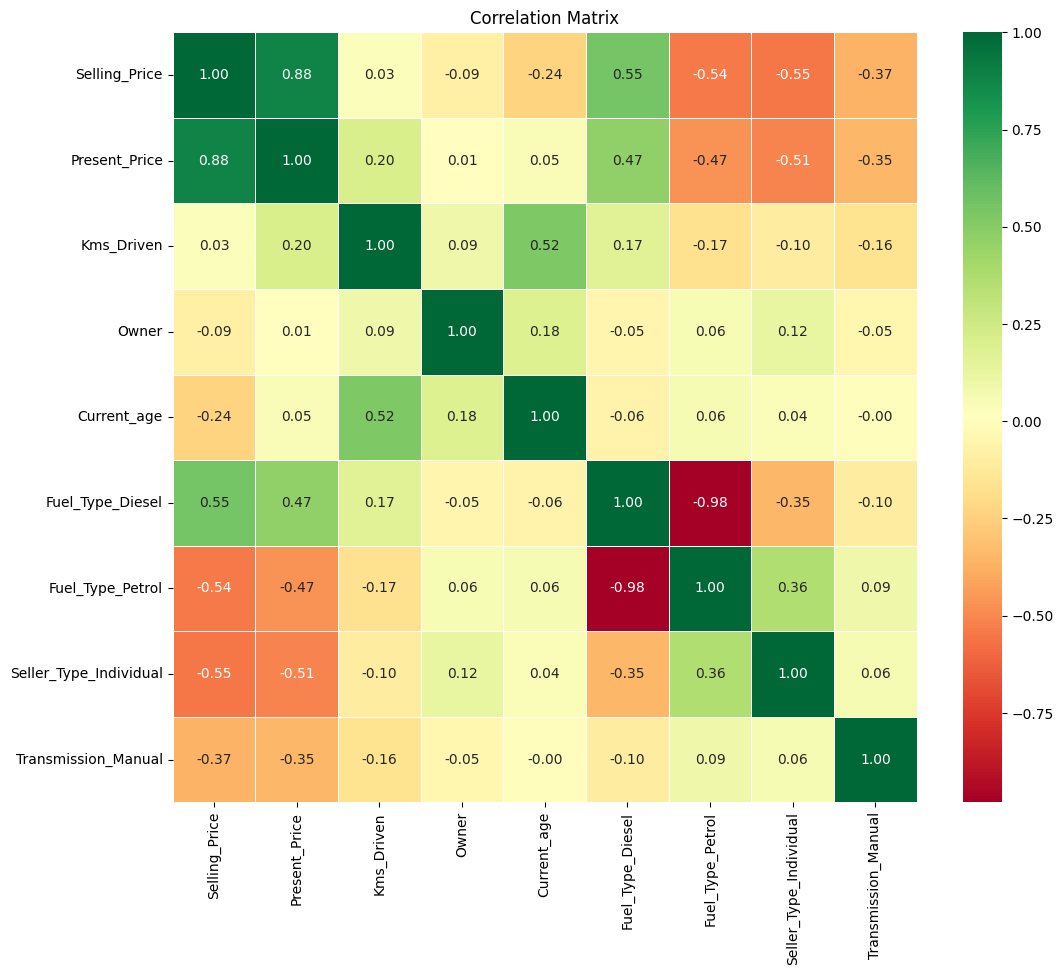

In [ ]:
corrmap = df_dummies.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corrmap, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix')

plt.show()

Наибольшую корреляцию между собой имеют признаки Selling_Price и Present_Price (0.8789825). Также можно увидеть взаимосвязь между Kms_Driven и Current_age (0.524342), очевидно, что чем машина старше, тем больше ее пробег.

# Обучение модели

В процессе работы мы решили разделиться и обучить две разные модели: Линейная регрессия и CatBoost.

**Линейная регрессия** — это метод анализа данных, который предсказывает ценность неизвестных данных с помощью другого связанного и известного значения данных. Он математически моделирует неизвестную или зависимую переменную и известную или независимую переменную в виде линейного уравнения.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df_dummies.drop("Selling_Price", axis = 1)

y = df_dummies['Selling_Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

basic_model = LinearRegression()

basic_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = basic_model.predict(x_test)

print(y_pred)

[ 7.78311122  0.80492133  1.88830514  2.05092328  5.25115027  6.80264993
 19.67617202 -3.31906928  1.01503656  4.40955539  0.06921872  8.82362161
  4.36530362 -0.92527751  5.86117097  3.39067632  4.49404012 -7.32674476
  2.63008919  5.8196613   2.02048028  3.28380042  7.1736321  21.400031
 -1.1927516   1.05496637 -1.28541438 -2.6264342   1.53299396 -3.3484441
 -0.21498222 14.17717564  4.59388907  7.82766871  0.03443517  6.65924906
  2.64179911  3.584844    1.63226888  4.21150507  5.96754066  0.30425128
  6.50030368  0.03642455 10.5096747   3.36778343 -0.82293639  4.8383662
  8.91816649  0.91559335 -1.1786691   6.29141418  0.87144646  9.80802498
  4.69425292  4.53578149  9.15581942 -0.03558632  6.8589744  10.04709131
  1.4740738 ]


In [ ]:
mae = mean_absolute_error(y_test, y_pred)

print('MAE:', mae)

MAE: 1.2944987410104352


Целевая переменная - цена текущая стоимость автомобиля. MAE может интерпретироваться как средняя ошибка предсказания в размере примерно 1,294. Иными словами, в среднем предсказанные значения отклоняются от фактических на примерно 1,294 единицы.

In [ ]:
print(r2_score(y_test, y_pred))

0.8436773164235075


Коэффициент детерминации стремится к единице, следовательно, модель хорошо объясняет вариацию зависимой переменной.

In [ ]:
df_scatter = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

fig2 = px.scatter(df_scatter, x='y_test', y='y_pred', labels={'y_test': 'Истинное значение', 'y_pred': 'Предсказанное значение'})

fig2.add_trace(go.Scatter(x=df_scatter['y_test'], y=df_scatter['y_test'], mode='lines', name='Идельные предсказания'))

fig2.update_layout(title='График рассеяния', xaxis_title='Истинные значения', yaxis_title='Предсказанные значения')
fig2.show()

fig2.write_html("scatter_plot.html")

В большинстве своем точки на графике лежат близко к линии, проходящей через начало координат, что указывает на хорошее качество модели.

# Вторая модель

**CatBoost (Category Boosting)** — мощный алгоритм градиентного бустинга от Яндекса. Алгоритм подходит для обработки как числовых, так и категориальных данных, с его помощью можно решать широкий спектр задач машинного обучения. Также он использует симметричную оптимизацию с использованием градиентов второго порядка. Он построен на основе принципов классического алгоритма градиентного бустинга, но с добавлением дополнительных функций, таких как обработка категориальных признаков, поддержка отсутствующих значений и возможность работать с большими наборами данных. Кроме этого, CatBoost использует симметричную оптимизацию, которая учитывает как положительные, так и отрицательные градиенты, что позволяет строить более точные деревья.

In [ ]:
!pip install scikit-learn catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

# Загружаем данные
df = pd.read_csv('car_price_prediction.csv')

# Информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Проверка пропущенных значений
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# Описательная статистика
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# Количество уникальных названий машин
unique_car_names = df['Car_Name'].nunique()
print(unique_car_names)

98


In [ ]:
# Удаляем столбец 'Car_Name'
df_dropped = df.drop('Car_Name', axis=1)

In [ ]:
# Создаем новый признак 'Current_age' и удаляем 'Year'
df_dropped['Current_age'] = 2024 - df_dropped['Year']
df_dropped = df_dropped.drop('Year', axis=1)

# Разделение на числовые и категориальные признаки
num_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Current_age']
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']

In [ ]:
# Разделение данных на признаки и целевую переменную
X = df_dummies.drop("Selling_Price", axis = 1)
y = df_dummies['Selling_Price']

# Разделение данных на тренировочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Инициализация и обучение модели CatBoostClassifier
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0, random_seed=10)
catboost_model.fit(x_train, y_train)

# Предсказание на тестовой выборке
y_pred = catboost_model.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)

print('MAE:', mae)

MAE: 0.5831266722269283


Целевая переменная - цена текущая стоимость автомобиля. MAE может интерпретироваться как средняя ошибка предсказания в размере примерно 0.583. Иными словами, в среднем предсказанные значения отклоняются от фактических на примерно 0.583 единицы. Это ощутимая разница с результатами MAE у линейной регрессии.

In [ ]:
print(r2_score(y_test, y_pred))

0.9351362766655329


Коэффициент детерминации стремится сильнее к единице, чем в линейной регрессии.

In [ ]:
# Построение графика рассеяния для предсказанных и истинных значений
df_scatter = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

fig2 = px.scatter(df_scatter, x='y_test', y='y_pred', labels={'y_test': 'Истинное значение', 'y_pred': 'Предсказанное значение'})
fig2.add_trace(go.Scatter(x=df_scatter['y_test'], y=df_scatter['y_test'], mode='lines', name='Идельные предсказания'))
fig2.update_layout(title='График рассеяния', xaxis_title='Истинные значения', yaxis_title='Предсказанные значения')
fig2.show()

fig2.write_html("scatter_plot.html")

Идеальные предсказания получились другими, но почти схожи с выводом линейной регрессии.

# Сравнение моделей обучения



*   **Линейная регрессия**

---
Плюсами линейных моделей в задачах машинного обучения однозначно можно выделить то, что они хорошо изучены и могут очень быстро работать на очень больших выборках. Также линейная регрессия проста в реализации и облегчает интерпретацию выходных коэффициентов.
Есть много информаций и обсуждений на форумах, соотвественно помощь или полезную информаци. можно получить на любом информационном источнике.

К сожалению, основным минусом является плохая работа в задачах, в которых зависимость ответов от признаков сложная, нелинейная.




*   **CatBoost**

---
У этой библиотеки можно выделить несколько плюсов:


1.   Позволяет получить отличные результаты с параметрами по умолчанию, что сокращает время, необходимое для настройки гиперпараметров.
2.   Обеспечивает повышенную точность за счет уменьшения переобучения.


Однако при использовании этой библиотеки можно наткнуться и на ее недостатки - это протребление памяти: для CatBoost могут потребоваться значительные ресурсы памяти, особенно для больших наборов данных или данных с категориальными характеристиками большого количества элементов, и время обучения: обучение моделей CatBoost может быть трудоемким с точки зрения вычислений, особенно с гиперпараметрами по умолчанию или сложными наборами данных, что приводит к увеличению времени обучения.

Также хотелось бы отметить, что у CatBoost может быть меньшее сообщество и менее обширная документация по сравнению с другими популярными библиотеками машинного обучения, что потенциально затрудняет пользователям поиск ресурсов и поддержки.
